## Telco Customer churn Analysis

## 🧾 1. Introduction

Objective: Analyze customer churn and factors behind it


## 📥 2. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 📄 3. Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\HP\Downloads\telco_churn.csv.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🔍 4. Initial Exploration

In [7]:
# shape of the data set
print(f"rows : {df.shape[0]}, columns : {df.shape[1]}")

rows : 7043, columns : 21


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
print(df.duplicated().sum())

0


In [15]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## 🧹 5. Data Cleaning

In [17]:
print(df['TotalCharges'].dtype)

object


In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


In [21]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
df = df.dropna(subset = ['TotalCharges'])

## 🧠 6. Target Variable Exploration

In [25]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [27]:
df['Churn'].value_counts(normalize = True) * 100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

## 🧩 7. Categorical Variable Analysis

In [29]:
pd.crosstab(df['gender'],df['Churn'],normalize = 'index') * 100

Churn,No,Yes
gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


In [31]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'],normalize = 'index') * 100
print(contract_churn)

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


In [33]:
payment_churn = pd.crosstab(df['PaymentMethod'],df['Churn'],normalize = 'index') * 100
print(payment_churn)

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


## visualization

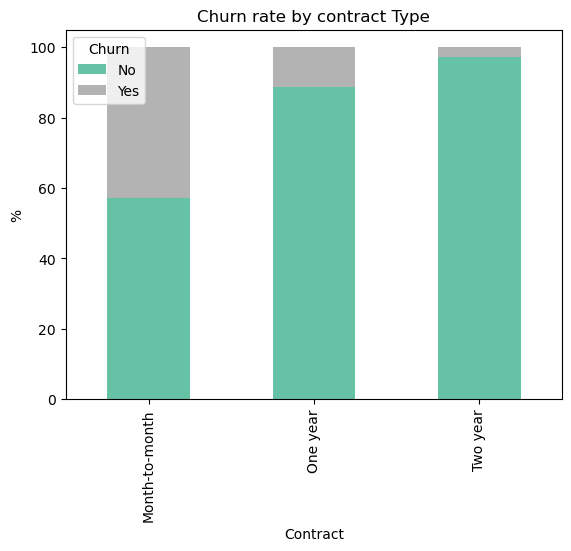

In [36]:
contract_churn.plot(kind = 'bar', stacked = True,colormap = 'Set2')
plt.title('Churn rate by contract Type')
plt.ylabel('%')
plt.show()

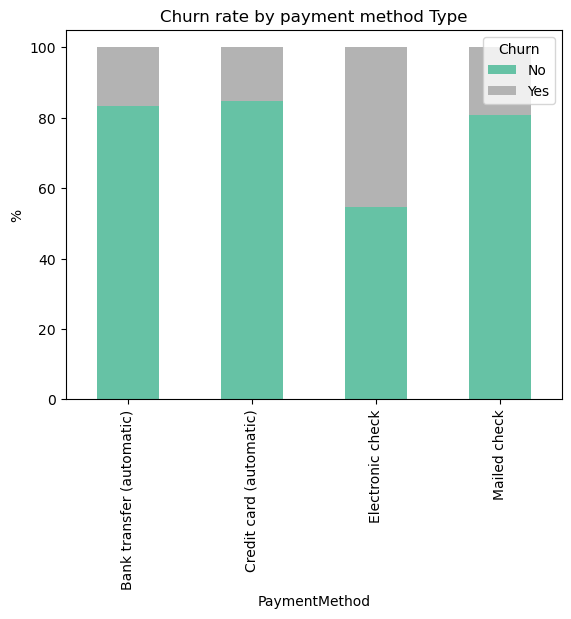

In [38]:
payment_churn.plot(kind = 'bar', stacked = True,colormap = 'Set2')
plt.title('Churn rate by payment method Type')
plt.ylabel('%')
plt.show()


## 📊 8. Numerical Variable Analysis

In [41]:
df.groupby('Churn')[['tenure','TotalCharges','MonthlyCharges']].mean()

,tenure,TotalCharges,MonthlyCharges
Churn,,,
No,37.650010,2555.344141,61.307408
Yes,17.979133,1531.796094,74.441332


## 9.Visualization

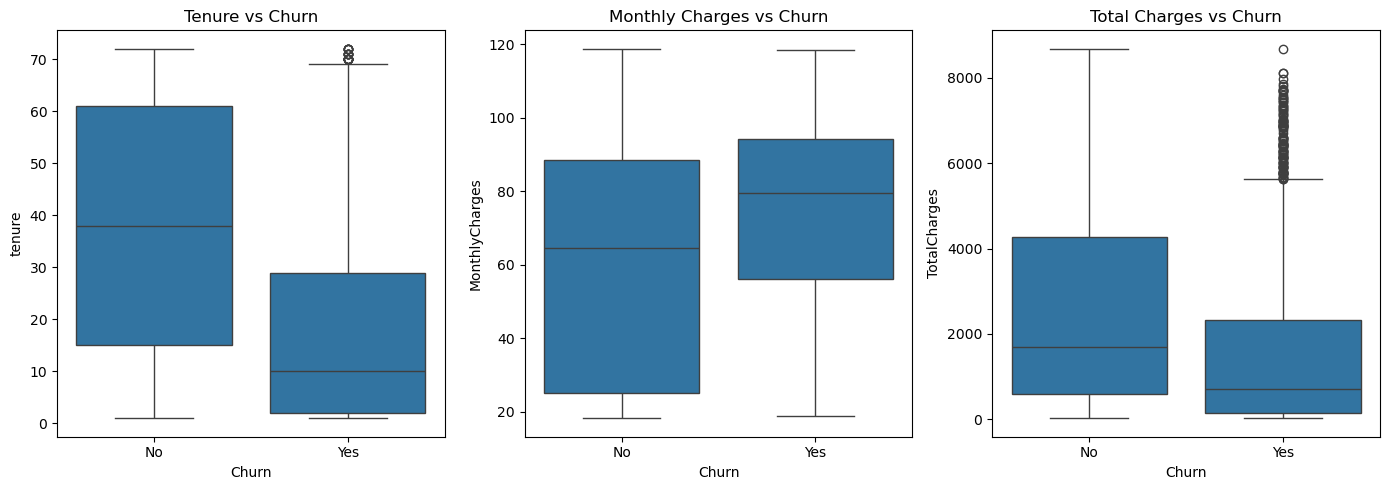

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Tenure
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')

# MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

# TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()


<Axes: >

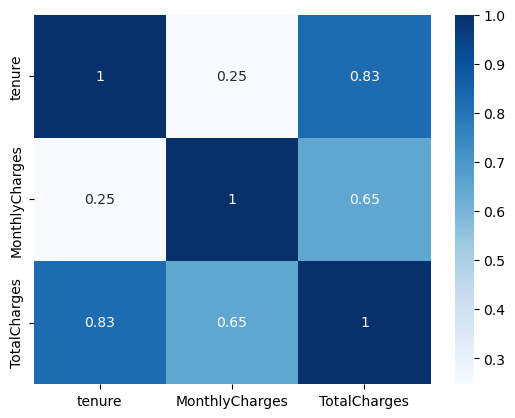

In [50]:
import seaborn as sns

df_num = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
